In [38]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import datetime as datetime

In [39]:
df = pd.read_csv('sources/NBA_players_2015.csv')
df2 = pd.read_csv('sources/nba.csv')
df3 = pd.read_csv('sources/NBA_Team_IDs.csv')
df.head()

,Unnamed: 0,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [5]:
df2.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [110]:
df3.head()

,Season,League,BBRef_Team_Name,BBRef_Team_Abbreviation,Current_BBRef_Team_Name,Current_BBRef_Team_Abbreviation,ESPN_Current_Link_ID,NBA_Current_Link_ID,Spotrac_Current_Link_ID
0,2019,NBA,Atlanta Hawks,ATL,Atlanta Hawks,ATL,ATL,1610612737,atlanta-hawks
1,2018,NBA,Atlanta Hawks,ATL,Atlanta Hawks,ATL,ATL,1610612737,atlanta-hawks
2,2017,NBA,Atlanta Hawks,ATL,Atlanta Hawks,ATL,ATL,1610612737,atlanta-hawks
3,2016,NBA,Atlanta Hawks,ATL,Atlanta Hawks,ATL,ATL,1610612737,atlanta-hawks
4,2015,NBA,Atlanta Hawks,ATL,Atlanta Hawks,ATL,ATL,1610612737,atlanta-hawks


In [111]:
#Dimension of the season stats
df.shape

(478, 50)

In [112]:
#Dimension of the player stats
df2.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [36]:
df2.shape

(458, 9)

In [113]:
df2["Salary"] = df2['Salary'].fillna(0)

In [45]:
df2.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [114]:
df3 = df3.drop(df3.columns[[0, 1, 4, 5, 6, 7, 8]], axis=1)

In [76]:
data_df2.shape

(122, 9)

In [71]:
data_df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [72]:
data_df.shape

(366, 9)

In [82]:
df3.head()

,BBRef_Team_Name,BBRef_Team_Abbreviation
0,Atlanta Hawks,ATL
1,Atlanta Hawks,ATL
2,Atlanta Hawks,ATL
3,Atlanta Hawks,ATL
4,Atlanta Hawks,ATL


In [67]:
df3.shape

(1545, 3)

In [77]:
#Check column names
df.columns

Index(['Unnamed: 0', 'season_end', 'player', 'pos', 'age', 'bref_team_id', 'g',
       'gs', 'mp', 'fg', 'fga', 'fg_', 'x3p', 'x3pa', 'x3p_', 'x2p', 'x2pa',
       'x2p_', 'ft', 'fta', 'ft_', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [12]:
# joined_df = data_df.set_index('Team'),df3.set_index('BBRef_Team_Name')], axis=1)
joined_df = pd.merge(data_df, df3,  how='left', left_on=['Team'], right_on = ['BBRef_Team_Name'])


In [13]:
joined_df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Season,League,BBRef_Team_Name,BBRef_Team_Abbreviation,Current_BBRef_Team_Name,Current_BBRef_Team_Abbreviation,ESPN_Current_Link_ID,NBA_Current_Link_ID,Spotrac_Current_Link_ID
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2019,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
1,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2018,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
2,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2017,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
3,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2016,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
4,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2015,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics


In [90]:
joined_df.shape


(14937, 11)

In [93]:
data2.head()

Name             Team                  
Aaron Gordon     Orlando Magic              4171680.0
Aaron Harrison   Charlotte Hornets           525093.0
Adreian Payne    Minnesota Timberwolves     1938840.0
Al Horford       Atlanta Hawks             12000000.0
Al-Farouq Aminu  Portland Trail Blazers     8042895.0
Name: Salary, dtype: float64

In [96]:
data2.shape

(366,)

In [97]:
data2.head()

Name             Team                  
Aaron Gordon     Orlando Magic              4171680.0
Aaron Harrison   Charlotte Hornets           525093.0
Adreian Payne    Minnesota Timberwolves     1938840.0
Al Horford       Atlanta Hawks             12000000.0
Al-Farouq Aminu  Portland Trail Blazers     8042895.0
Name: Salary, dtype: float64

In [14]:
joined_df[['Salary']] = joined_df[['Salary']].fillna(value=0)

In [15]:
joined_df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Season,League,BBRef_Team_Name,BBRef_Team_Abbreviation,Current_BBRef_Team_Name,Current_BBRef_Team_Abbreviation,ESPN_Current_Link_ID,NBA_Current_Link_ID,Spotrac_Current_Link_ID
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2019,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
1,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2018,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
2,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2017,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
3,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2016,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics
4,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,2015,NBA,Boston Celtics,BOS,Boston Celtics,BOS,BOS,1610612738,boston-celtics


In [119]:
joined_df.head()

0    7730337.0
1    7730337.0
2    7730337.0
3    7730337.0
4    7730337.0
Name: Salary, dtype: float64

In [17]:
data3 = joined_df.sort_values(['Salary'],ascending=False)

In [128]:
joined_df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,BBRef_Team_Name,BBRef_Team_Abbreviation
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
1,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
2,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
3,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS
4,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Boston Celtics,BOS


In [7]:
data3.head(50)

NameError: name 'data3' is not defined

In [182]:
#filter on a specific state
type(data3)


pandas.core.frame.DataFrame

In [40]:
#Create cut bins
mybins=[25,35,45,55,65,75,85,100]
withRange = pd.DataFrame(data3,columns = ['Name','Team','Age','College','Salary'])
withRange.head()
withRange.dropna()

,Name,Team,Age,College,Salary
13497,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13490,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13491,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13492,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
13494,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0
...,...,...,...,...,...
150,John Holland,Boston Celtics,27.0,Boston University,0.0
151,John Holland,Boston Celtics,27.0,Boston University,0.0
152,John Holland,Boston Celtics,27.0,Boston University,0.0
153,John Holland,Boston Celtics,27.0,Boston University,0.0


In [41]:
withRange.head()

,Name,Team,Age,College,Salary
9908,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
9871,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
9882,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
9880,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
9879,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0


In [29]:
withRange.dropna()

,level_0,index,Name,Team,Age,College,Salary,age_range
49,49,13497,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0,25-34
50,50,13490,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0,25-34
51,51,13491,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0,25-34
52,52,13492,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0,25-34
53,53,13494,Kevin Durant,Oklahoma City Thunder,27.0,Texas,20158622.0,25-34
...,...,...,...,...,...,...,...,...
14932,14932,150,John Holland,Boston Celtics,27.0,Boston University,0.0,25-34
14933,14933,151,John Holland,Boston Celtics,27.0,Boston University,0.0,25-34
14934,14934,152,John Holland,Boston Celtics,27.0,Boston University,0.0,25-34
14935,14935,153,John Holland,Boston Celtics,27.0,Boston University,0.0,25-34


In [43]:
withRange.head()

,index,Name,Team,Age,College,Salary
0,9908,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
1,9871,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
2,9882,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
3,9880,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0
4,9879,Dwight Howard,Houston Rockets,30.0,NaN,22359364.0


In [48]:
mylabels=['25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
# Use the .cut method to create a new variable using those cut points and labels.
# data4['Range']=pd.cut(data3['Age'], bins=mybins, labels=mylabels)
withRange['age_range']=pd.cut(withRange['Age'], bins=mybins, labels=mylabels)
withRange.info

<bound method DataFrame.info of        index           Name               Team   Age            College  \
0       9908  Dwight Howard    Houston Rockets  30.0                NaN   
1       9871  Dwight Howard    Houston Rockets  30.0                NaN   
2       9882  Dwight Howard    Houston Rockets  30.0                NaN   
3       9880  Dwight Howard    Houston Rockets  30.0                NaN   
4       9879  Dwight Howard    Houston Rockets  30.0                NaN   
...      ...            ...                ...   ...                ...   
14932    150   John Holland     Boston Celtics  27.0  Boston University   
14933    151   John Holland     Boston Celtics  27.0  Boston University   
14934    152   John Holland     Boston Celtics  27.0  Boston University   
14935    153   John Holland     Boston Celtics  27.0  Boston University   
14936  10178  Jordan Farmar  Memphis Grizzlies  29.0               UCLA   

           Salary age_range  
0      22359364.0     25-34  
1      

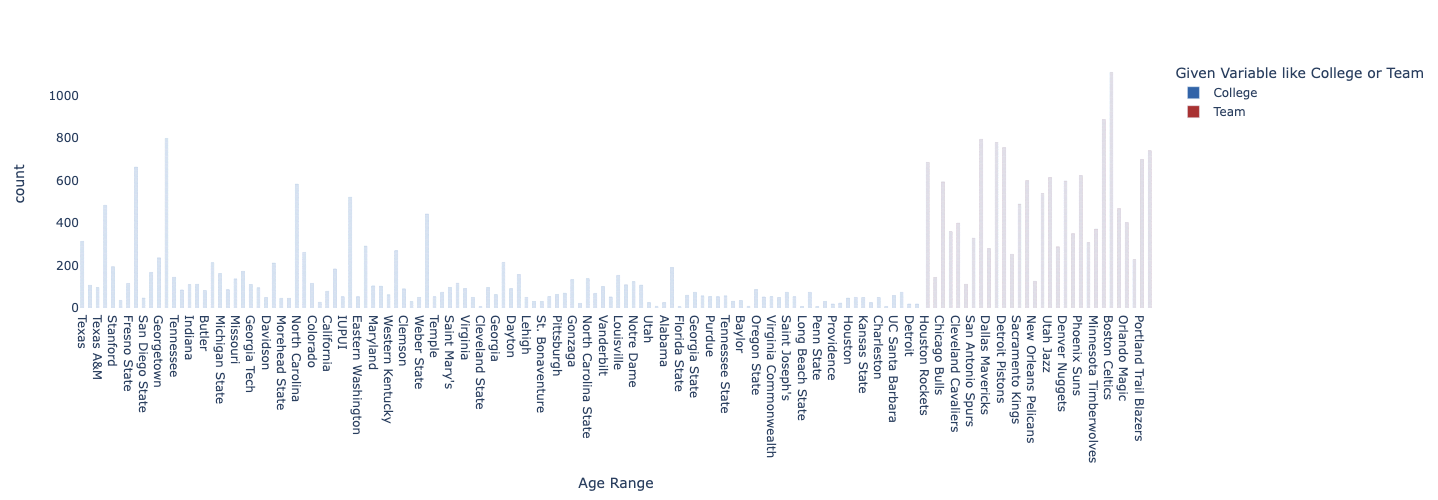

In [49]:
mycolorscale = 'Sunset' # Note: The error message will list possible color scales.
color_discrete_sequence = ['#3264A8','#A83232']

withRange.reset_index(level=0, inplace=True)
fig2 = px.bar(withRange, x='age_range', y=['College','Team'],
          barmode='group',labels={'value':'Age Range','variable':'Given Variable like College or Team'},color_discrete_sequence=color_discrete_sequence)
fig2.update_layout(
    width=1200,
    height=500,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

In [210]:
df.head()

,Unnamed: 0,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,age_range,Range
0,0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,...,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3,NaN,NaN
1,1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,...,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0,NaN,NaN
2,2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,...,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6,NaN,NaN
3,3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,...,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0,NaN,NaN
4,4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,...,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2,NaN,NaN
